# Feature Engineering
# New section
---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## 2. Load data

In [5]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [ ]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   
2                   0.000000                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01              44.236702      1  
1       1.217891e-03               0.000000      0  
2       9.450150e-08               0.000000      0  

[3 rows x 44 columns]

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
2  00114d74e963e47177db89bc70108537                        -0.003994   
3  001cd16732dc7d5bdf46b0d49996c271                         0.047697   
4  001dc71143f45cb58aaccc2e94823c5a                        -0.003778   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.162916  
2                       -0.000001  
3                        2.177779  
4                        0.177779

In [8]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
1  01495c955be7ec5e7f3203406785aae0  foosdfpfkusacimwkcsosbicdxkicaua   
2  d5e512dbc8118a830a7b8c7f61d89992  usilxuppasemubllopkaafesmlibmsdf   
3  21860c2ff2d5df75503b230ce629c253  foosdfpfkusacimwkcsosbicdxkicaua   
4  e4773b60d2e68aac94795782abfc006b  lmkebamcaaclubfxadlmueccxoimlema   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0       544             0                0 2010-04-16 2016-04-16   
1     29552             0             1260 2010-04-21 2016-04-21   
2     10831             0             3112 2011-07-11 2016-07-11   
3      7726             0                0 2013-01-22 2017-01-22   
4     47019             0             3161 2012-04-20 2016-04-20   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2010-04-16   2015-04-17              47.96  ...   
1      2010-04-21   2015-04-22             864.73  ...   
2      2011-07-11   2015-07-12            1204.58  ...   
3      2015-11-18   2016-01-24             914.10  ...   
4      2012-04-20   2015-04-21            1687.29  ...   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               0.000000e+00                   0.000000   
1               4.860000e-10                   0.000000   
2               0.000000e+00                   0.005268   
3               0.000000e+00                   0.009482   
4               0.000000e+00                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0                    0.0                        0.0               0.000004   
1                    0.0                        0.0               0.000011   
2                    0.0                        0.0               0.005268   
3                    0.0                        0.0               0.009490   
4                    0.0                        0.0               0.000003   

   var_6m_price_peak var_6m_price_mid_peak  churn  \
0       9.450150e-08          0.000000e+00      0   
1       2.896760e-06          4.860000e-10      0   
2       2.253388e-06          0.000000e+00      0   
3       3.515100e-06          0.000000e+00      0   
4       0.000000e+00          0.000000e+00      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                        -0.004670                        0.177779  
1                        -0.007801                        0.162916  
2                        -0.001547                        0.177779  
3                        -0.008152                        0.177779  
4                        -0.003423                        0.177779  

[5 rows x 46 columns]

In [9]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()


# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']


columns = [
    'id',
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

id                     channel_sales  \
0  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
1  01495c955be7ec5e7f3203406785aae0  foosdfpfkusacimwkcsosbicdxkicaua   
2  d5e512dbc8118a830a7b8c7f61d89992  usilxuppasemubllopkaafesmlibmsdf   
3  21860c2ff2d5df75503b230ce629c253  foosdfpfkusacimwkcsosbicdxkicaua   
4  e4773b60d2e68aac94795782abfc006b  lmkebamcaaclubfxadlmueccxoimlema   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0       544             0                0 2010-04-16 2016-04-16   
1     29552             0             1260 2010-04-21 2016-04-21   
2     10831             0             3112 2011-07-11 2016-07-11   
3      7726             0                0 2013-01-22 2017-01-22   
4     47019             0             3161 2012-04-20 2016-04-20   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_mid_peak  \
0      2010-04-16   2015-04-17              47.96  ...           0.000000e+00   
1      2010-04-21   2015-04-22             864.73  ...           4.860000e-10   
2      2011-07-11   2015-07-12            1204.58  ...           0.000000e+00   
3      2015-11-18   2016-01-24             914.10  ...           0.000000e+00   
4      2012-04-20   2015-04-21            1687.29  ...           0.000000e+00   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      0                        -0.004670                        0.177779   
1      0                        -0.007801                        0.162916   
2      0                        -0.001547                        0.177779   
3      0                        -0.008152                        0.177779   
4      0                        -0.003423                        0.177779   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.082090                     0.088421   
1                     0.020314                     0.028965   
2                     0.081795                     0.085745   
3                     0.081538                     0.087640   
4                     0.149044                     0.000000   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.170512                    44.385450   
1                        0.049279                    16.269833   
2                        0.167540                    44.341005   
3                        0.169177                    44.311375   
4                        0.149044                    44.385450   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     0.000000                        44.385450  
1                     8.134914                        24.404747  
2                     0.000000                        44.341005  
3                     0.000000                        44.311375  
4                     0.000000                        44.385450  

[5 rows x 52 columns]

In [10]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()


# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']


In [11]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [12]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

id                     channel_sales  \
0  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
1  01495c955be7ec5e7f3203406785aae0  foosdfpfkusacimwkcsosbicdxkicaua   
2  d5e512dbc8118a830a7b8c7f61d89992  usilxuppasemubllopkaafesmlibmsdf   
3  21860c2ff2d5df75503b230ce629c253  foosdfpfkusacimwkcsosbicdxkicaua   
4  e4773b60d2e68aac94795782abfc006b  lmkebamcaaclubfxadlmueccxoimlema   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0       544             0                0 2010-04-16 2016-04-16   
1     29552             0             1260 2010-04-21 2016-04-21   
2     10831             0             3112 2011-07-11 2016-07-11   
3      7726             0                0 2013-01-22 2017-01-22   
4     47019             0             3161 2012-04-20 2016-04-20   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2010-04-16   2015-04-17              47.96  ...   
1      2010-04-21   2015-04-22             864.73  ...   
2      2011-07-11   2015-07-12            1204.58  ...   
3      2015-11-18   2016-01-24             914.10  ...   
4      2012-04-20   2015-04-21            1687.29  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.170512                    44.385450   
1                         0.049279                    16.269833   
2                         0.167540                    44.341005   
3                         0.169177                    44.311375   
4                         0.149044                    44.385450   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     0.000000                        44.385450   
1                     8.134914                        24.404747   
2                     0.000000                        44.341005   
3                     0.000000                        44.311375   
4                     0.000000                        44.385450   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.084587                            0.089162   
1                            0.022581                            0.031859   
2                            0.083972                            0.087890   
3                            0.084587                            0.088815   
4                            0.151250                            0.000000   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.172468                           44.444710   
1                               0.054440                           16.291555   
2                               0.168185                           44.444710   
3                               0.172468                           44.444710   
4                               0.151250                           44.444710   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            0.000000                                44.44471  
1                            8.145775                                24.43733  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            0.000000                                44.44471  

[5 rows x 58 columns]

# Bonus Feature engineering
## Tenure

How long a company has been a client of PowerCo.

In [13]:
df['tenure'] = ((df['date_end'] - df['date_activ']).dt.days / 365.25).astype(int)

In [14]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
13      0.153846
2       0.145455
3       0.141473
4       0.136279
6       0.083333
5       0.081890
7       0.078054
8       0.075472
12      0.063830
10      0.055556
11      0.046154
9       0.000000

companies who have been only client for four month or less then four month are much more likely to churn compared to other client

# Transforming dates into months

In [21]:
!pip install pandas
import pandas as pd
from datetime import datetime

def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]

    # Convert timedeltas to months
    months = time_delta.dt.days // 30

    return months

In [22]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [23]:
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
1  01495c955be7ec5e7f3203406785aae0  foosdfpfkusacimwkcsosbicdxkicaua   
2  d5e512dbc8118a830a7b8c7f61d89992  usilxuppasemubllopkaafesmlibmsdf   
3  21860c2ff2d5df75503b230ce629c253  foosdfpfkusacimwkcsosbicdxkicaua   
4  e4773b60d2e68aac94795782abfc006b  lmkebamcaaclubfxadlmueccxoimlema   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0       544             0                0              47.96   
1     29552             0             1260             864.73   
2     10831             0             3112            1204.58   
3      7726             0                0             914.10   
4     47019             0             3161            1687.29   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                    38.72   
1                 751                       0.0                   144.49   
2                3112                       0.0                    20.94   
3                   0                       0.0                    74.66   
4                1080                       0.0                    16.08   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.165794  ...                            0.089162   
1                        0.115174  ...                            0.031859   
2                        0.164637  ...                            0.087890   
3                        0.162327  ...                            0.088815   
4                        0.144902  ...                            0.000000   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.172468                          44.444710   
1                                0.054440                          16.291555   
2                                0.168185                          44.444710   
3                                0.172468                          44.444710   
4                                0.151250                          44.444710   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            0.000000                                44.44471   
1                            8.145775                                24.43733   
2                            0.000000                                44.44471   
3                            0.000000                                44.44471   
4                            0.000000                                44.44471   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       6            69              4                 69              8  
1       6            69              4                 69              8  
2       5            54              7                 54              5  
3       4            35             13                  1             -1  
4       4            45              4                 45              8  

[5 rows x 59 columns]

# Transforming Boolean Data

In [24]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.106934
1        0.079395

# Transforming categorical data

In [25]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    2790
MISSING                             1369
lmkebamcaaclubfxadlmueccxoimlema     715
usilxuppasemubllopkaafesmlibmsdf     567
ewpakwlliwisiwduibdlfmalxowmwpci     397
sddiedcslfslkckwlfkdpoeeailfpeds       6
epumfxlbckeskwekxbiuasklxalciiuu       1
fixdbufsefwooaasfcxdxadsiekoceaa       1
Name: count, dtype: int64

In [26]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  764c75f661154dac3a6c254cd082ea7d       544             0                0   
1  01495c955be7ec5e7f3203406785aae0     29552             0             1260   
2  d5e512dbc8118a830a7b8c7f61d89992     10831             0             3112   
3  21860c2ff2d5df75503b230ce629c253      7726             0                0   
4  e4773b60d2e68aac94795782abfc006b     47019             0             3161   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0              47.96                   0                       0.0   
1             864.73                 751                       0.0   
2            1204.58                3112                       0.0   
3             914.10                   0                       0.0   
4            1687.29                1080                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                    38.72                        0.165794   
1                   144.49                        0.115174   
2                    20.94                        0.164637   
3                    74.66                        0.162327   
4                    16.08                        0.144902   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.087899  ...       6            69              4   
1                    0.098837  ...       6            69              4   
2                    0.087381  ...       5            54              7   
3                    0.084428  ...       4            35             13   
4                    0.000000  ...       4            45              4   

   months_modif_prod  months_renewal  channel_MISSING  \
0                 69               8            False   
1                 69               8            False   
2                 54               5            False   
3                  1              -1            False   
4                 45               8            False   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                     False   
3                                      True   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                     True   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                      True  
3                                     False  
4                                     False  

[5 rows x 63 columns]

In [27]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()


origin_up
lxidpiddsbxsbosboudacockeimpuepw    2967
kamkkxfxxuwbdslkwifmmcsiusiuosws    1588
ldkssxwpmemidmecebumciepifcamkci    1262
MISSING                               28
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [32]:
# Transform into categorical type
#df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
#df['origin_up'].value_counts()

#df = pd.get_dummies(df, columns=['origin_up'], prefix='origin') # Change prefix to 'origin' to avoid duplicated column name
# Check the column names after creating dummy variables
#print(df.columns)
#df = df.drop(columns=['origin_MISSING', 'origin_ewxeelcelemmiwuafmddpobolfuxioce']) # Change column names to match new prefix
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  764c75f661154dac3a6c254cd082ea7d       544             0                0   
1  01495c955be7ec5e7f3203406785aae0     29552             0             1260   
2  d5e512dbc8118a830a7b8c7f61d89992     10831             0             3112   
3  21860c2ff2d5df75503b230ce629c253      7726             0                0   
4  e4773b60d2e68aac94795782abfc006b     47019             0             3161   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0              47.96                   0                       0.0   
1             864.73                 751                       0.0   
2            1204.58                3112                       0.0   
3             914.10                   0                       0.0   
4            1687.29                1080                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                    38.72                        0.165794   
1                   144.49                        0.115174   
2                    20.94                        0.164637   
3                    74.66                        0.162327   
4                    16.08                        0.144902   

   forecast_price_energy_peak  ...  channel_MISSING  \
0                    0.087899  ...            False   
1                    0.098837  ...            False   
2                    0.087381  ...            False   
3                    0.084428  ...            False   
4                    0.000000  ...            False   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                     False   
3                                      True   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                      True   

   channel_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                     False              False   
1                                     False              False   
2                                      True              False   
3                                     False              False   
4                                     False              False   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                        True   
1                                       False   
2                                        True   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                        True   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                       False  
1                                        True  
2                                       False  
3                                       False  
4                                       False  

[5 rows

# Transforming numerical Data

In [33]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  5.846000e+03  5.846000e+03      5846.000000        5846.000000   
mean   1.567074e+05  2.628848e+04     15960.626924        1888.440039   
std    5.695564e+05  1.493898e+05     64630.099776        2344.813226   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.699250e+03  0.000000e+00         0.000000         505.792500   
50%    1.437950e+04  0.000000e+00       789.500000        1117.050000   
75%    4.172750e+04  0.000000e+00      3450.000000        2472.022500   
max    6.207104e+06  2.813019e+06    771203.000000       61357.170000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count         5846.000000               5846.000000              5846.000000   
mean          1360.228190                  1.014882                62.726037   
std           2602.535147                  5.217718                64.475842   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.170000   
50%            331.500000                  0.000000                18.765000   
75%           1733.750000                  0.000000               130.997500   
max          63969.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                     5846.000000                 5846.000000   
mean                         0.137098                    0.049699   
std                          0.024150                    0.049194   
min                          0.000000                    0.000000   
25%                          0.116509                    0.000000   
50%                          0.143166                    0.083849   
75%                          0.146120                    0.098841   
max                          0.273963                    0.168092   

       forecast_price_pow_off_peak  
count                  5846.000000  
mean                     43.106191  
std                       4.310389  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [34]:
#Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [35]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  5846.000000   5846.000000      5846.000000        5846.000000   
mean      4.230538      0.770532         2.284292           2.969415   
std       0.871209      1.704106         1.758642           0.679744   
min       0.000000      0.000000         0.000000           0.000000   
25%       3.755894      0.000000         0.000000           2.704830   
50%       4.157774      0.000000         2.897902           3.048461   
75%       4.620433      0.000000         3.537945           3.393228   
max       6.792889      6.449173         5.887169           4.787872   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count         5846.000000               5846.000000              5846.000000   
mean             1.799506                  1.014882                 1.512893   
std              1.578873                  5.217718                 0.578215   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.234770   
50%              2.521791                  0.000000                 1.295897   
75%              3.239237                  0.000000                 2.120566   
max              4.805976                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                     5846.000000                 5846.000000   
mean                         0.137098                    0.049699   
std                          0.024150                    0.049194   
min                          0.000000                    0.000000   
25%                          0.116509                    0.000000   
50%                          0.143166                    0.083849   
75%                          0.146120                    0.098841   
max                          0.273963                    0.168092   

       forecast_price_pow_off_peak  
count                  5846.000000  
mean                     43.106191  
std                       4.310389  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

<ipython-input-36-8d2e7637aa83>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
<ipython-input-36-8d2e7637aa83>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
<ipython-input-36-8d2e7637aa83>:5: U

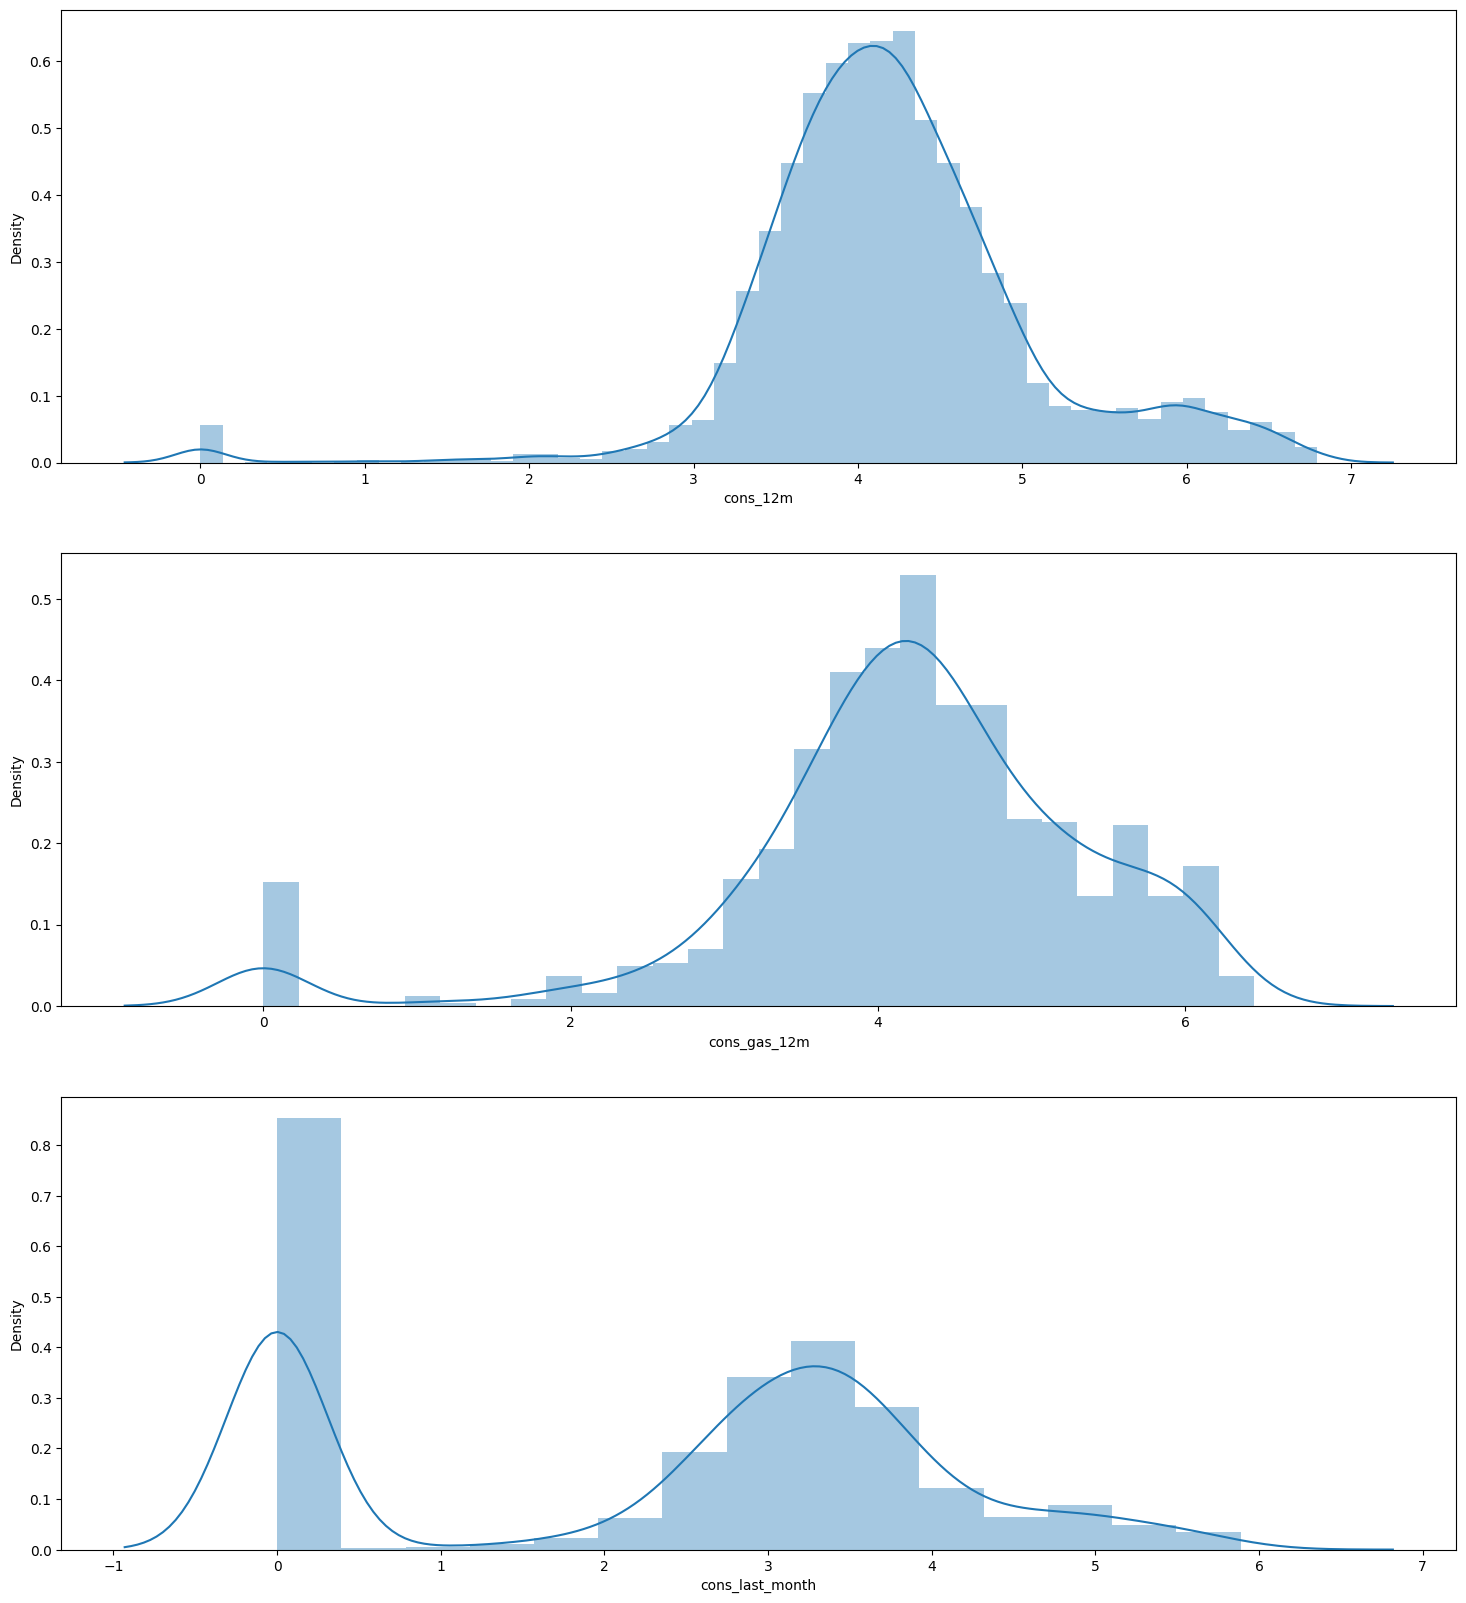

In [36]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()


# Corelation

In [38]:
correlation = df.corr(numeric_only=True)

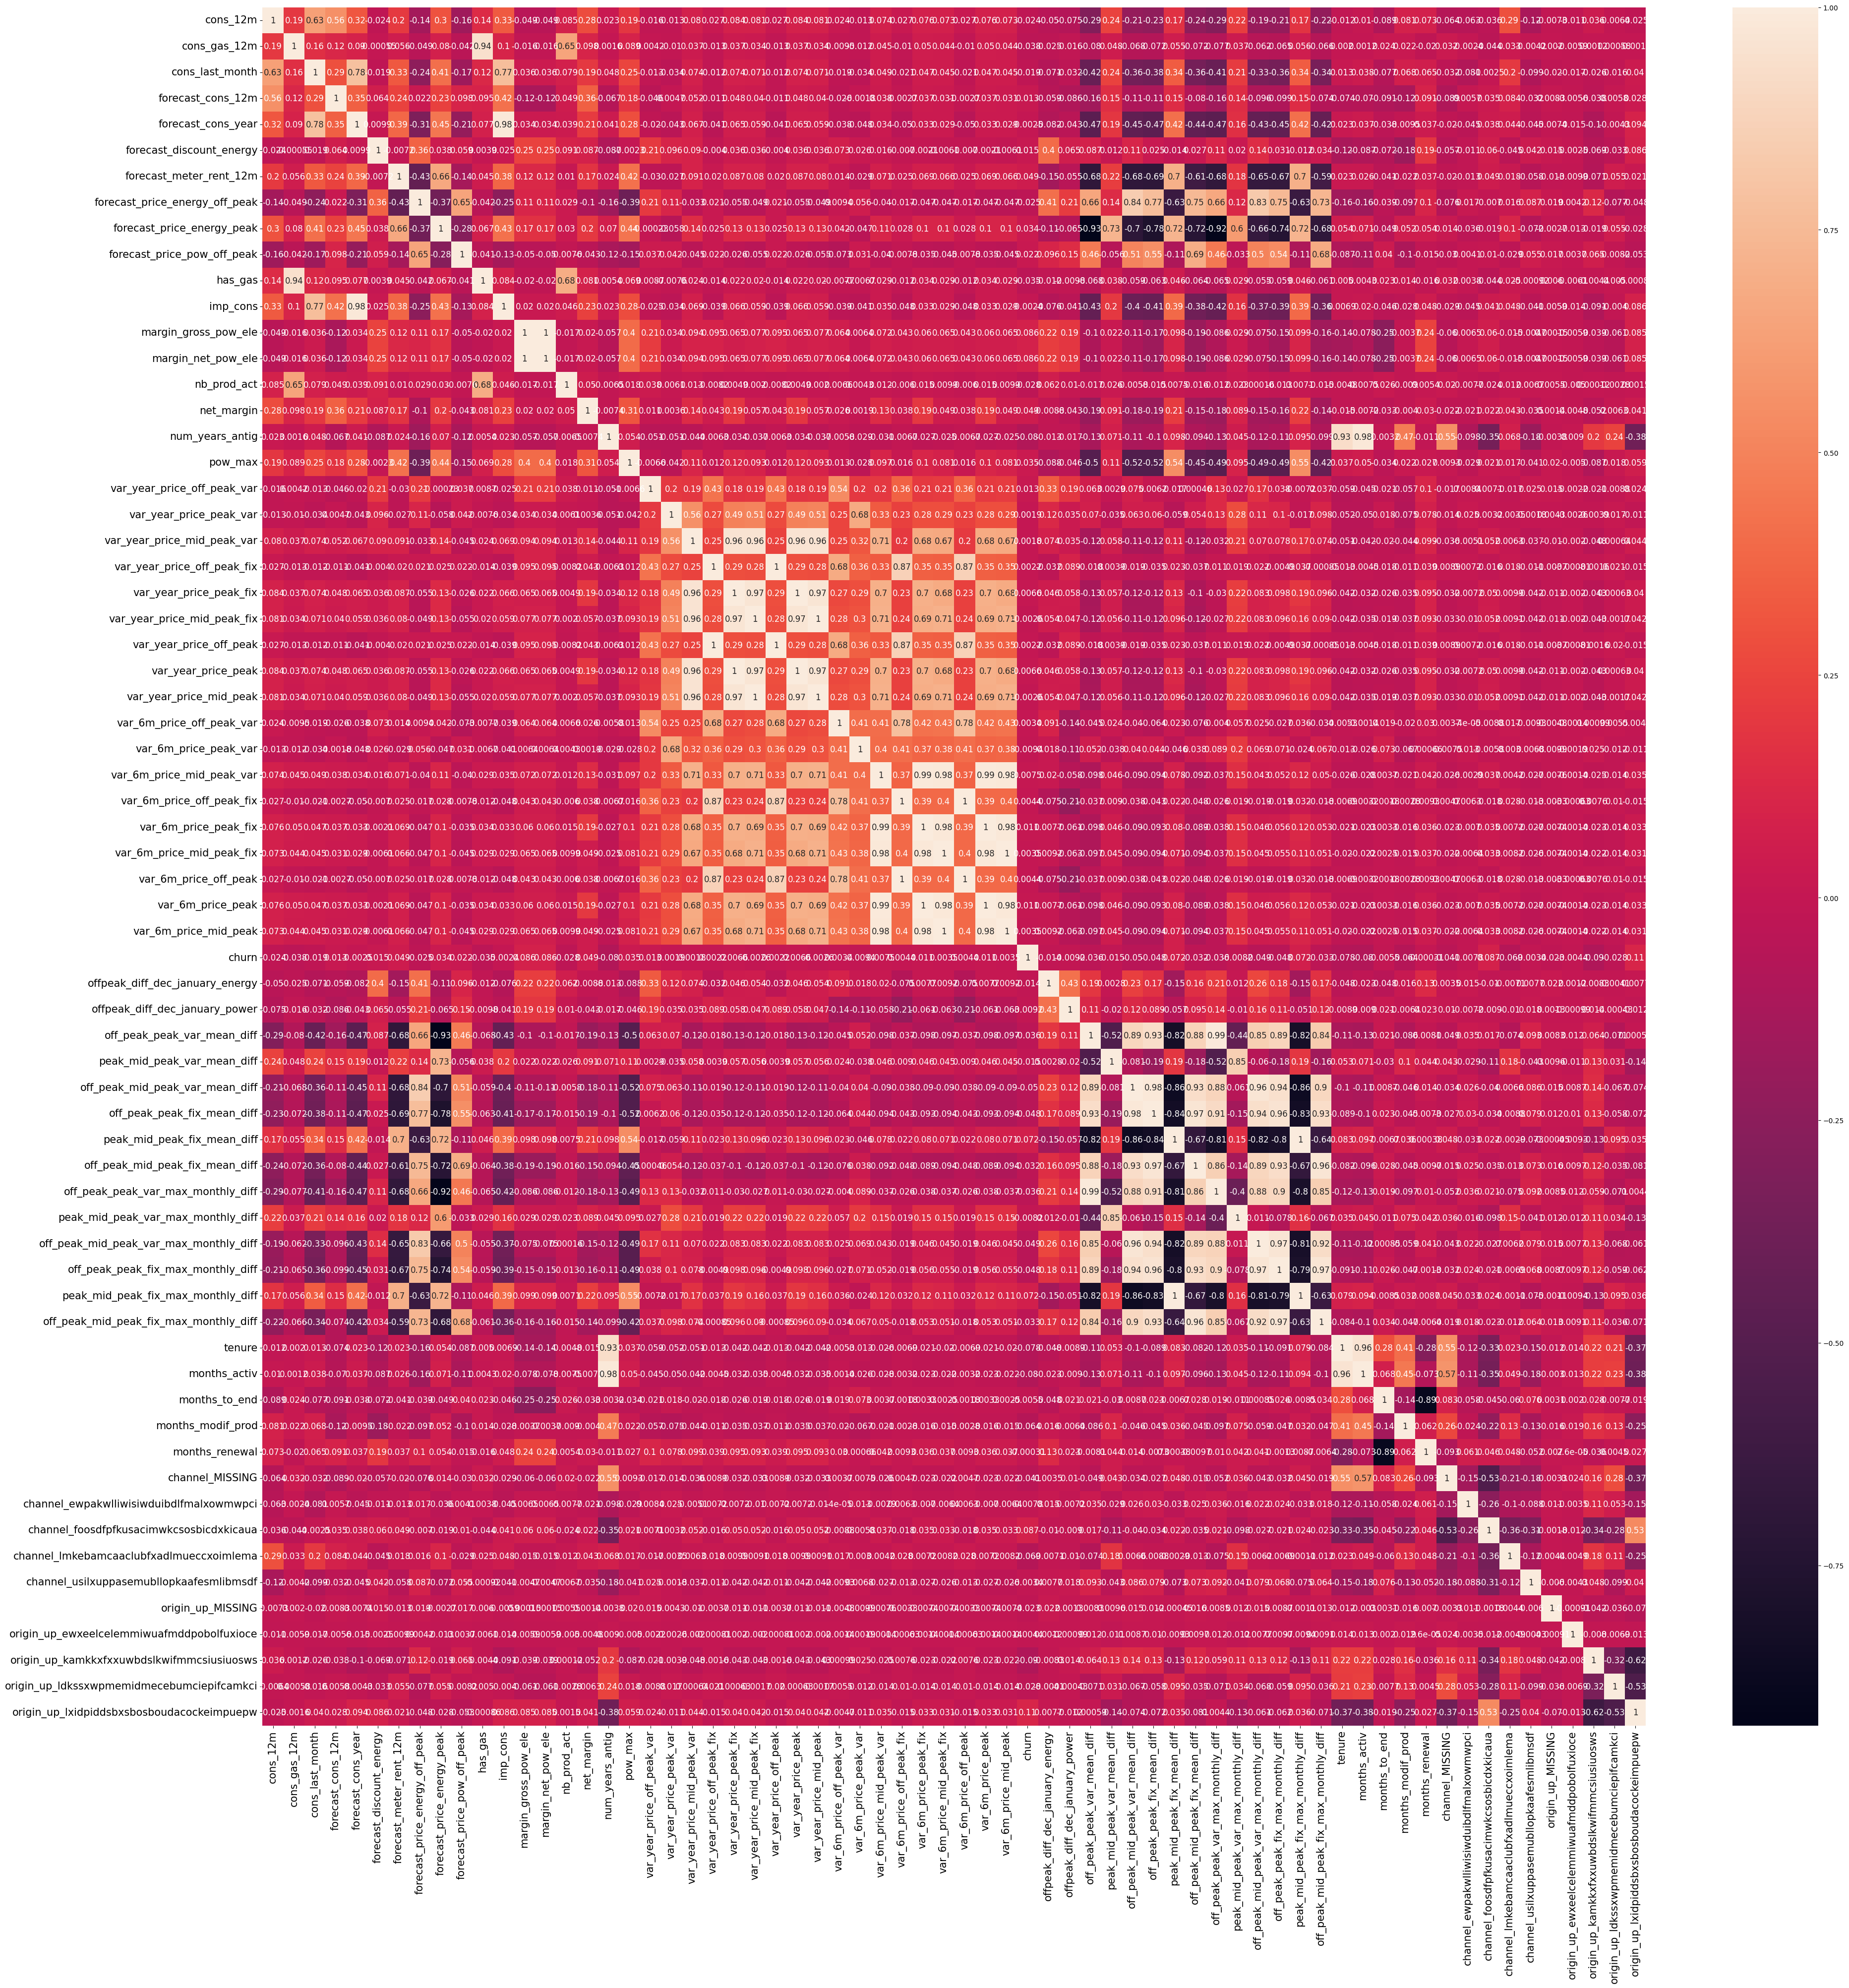

In [39]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [40]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  764c75f661154dac3a6c254cd082ea7d  2.736397           0.0         0.000000   
1  01495c955be7ec5e7f3203406785aae0  4.470602           0.0         3.100715   
2  d5e512dbc8118a830a7b8c7f61d89992  4.034709           0.0         3.493179   
3  21860c2ff2d5df75503b230ce629c253  3.888011           0.0         0.000000   
4  e4773b60d2e68aac94795782abfc006b  4.672283           0.0         3.499962   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           1.689841                       0.0                 1.599009   
1           2.937382                       0.0                 2.162833   
2           3.081196                       0.0                 1.341237   
3           2.961469                       0.0                 1.878866   
4           3.227447                       0.0                 1.232488   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.165794                    0.087899   
1                        0.115174                    0.098837   
2                        0.164637                    0.087381   
3                        0.162327                    0.084428   
4                        0.144902                    0.000000   

   forecast_price_pow_off_peak  ...  channel_MISSING  \
0                    44.311378  ...            False   
1                    40.606701  ...            False   
2                    44.311378  ...            False   
3                    44.311378  ...            False   
4                    44.311378  ...            False   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                      True   
2                                     False   
3                                      True   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                      True   

   channel_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                     False              False   
1                                     False              False   
2                                      True              False   
3                                     False              False   
4                                     False              False   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                        True   
1                                       False   
2                                        True   
3                                       False   
4                                       False   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                        True   
4                                        True   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                       False  
1                                        True  
2                                       False  
3                                       False  
4 

# Modelling

In [41]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Data Sampling
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [42]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(5846, 63)
(5846,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4384, 63)
(4384,)
(1462, 63)
(1462,)


# Model Training

In [44]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [45]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [46]:
y_test.value_counts()


churn
0    1318
1     144
Name: count, dtype: int64

In [47]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 6
False positives: 5
True negatives: 1313
False negatives: 138

Accuracy: 0.9021887824897401
Precision: 0.5454545454545454
Recall: 0.041666666666666664


# Model understanding

In [48]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

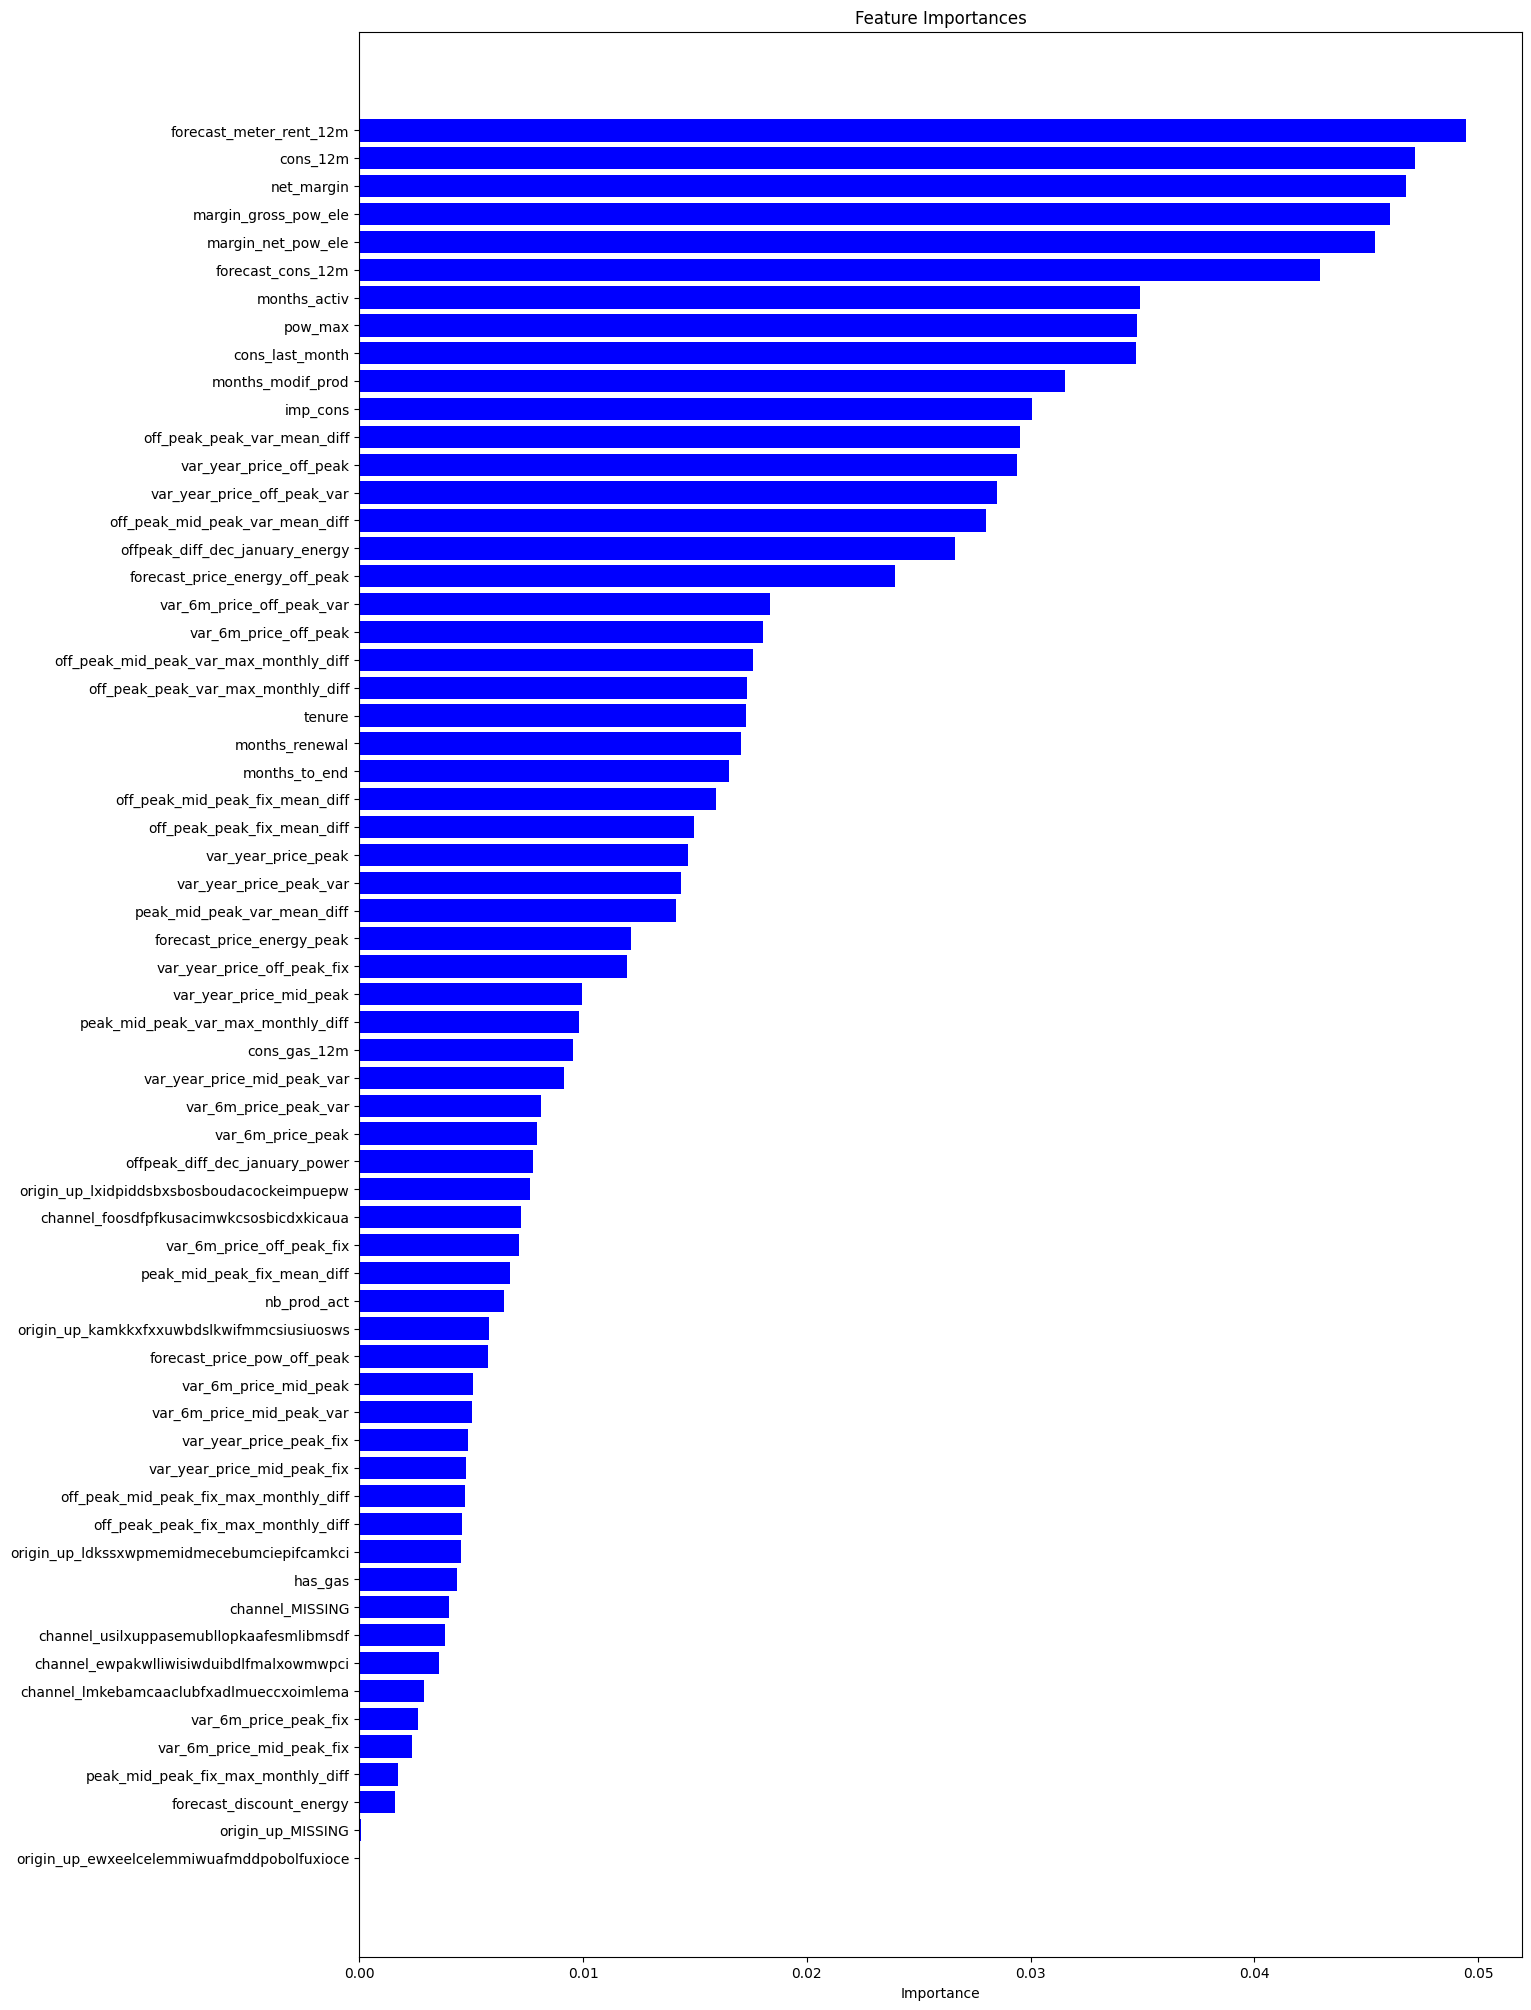

In [49]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [50]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [51]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [52]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')